# **Bootstrapping of Dictionaries** 

## **Word Level**

In [5]:
# packages
!pip install sentence-transformers==2.2.2
!pip install huggingface_hub #==0.25.1

!pip install wordcloud
!pip install adjustText

  Using cached huggingface_hub-0.30.2-py3-none-any.whl.metadata (13 kB)
Using cached huggingface_hub-0.30.2-py3-none-any.whl (481 kB)
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.25.1
    Uninstalling huggingface-hub-0.25.1:
      Successfully uninstalled huggingface-hub-0.25.1


In [1]:
import pandas as pd
import random
import numpy as np
from tqdm import tqdm
import json

from sklearn.metrics.pairwise import cosine_similarity
#from sentence_transformers import SentenceTransformer
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import json
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.patches as patches

from sklearn.feature_extraction.text import TfidfVectorizer
import math
from adjustText import adjust_text
from scipy.stats import pearsonr
from numpy import linalg as LA
from scipy.stats import zscore
import zipfile

## Models and Dictionaries

In [97]:
# import models

# AFTER POOL

finetuned_model = SentenceTransformer('../00_embedding_models/after_pool_finetuned_sentence_model_wordlim_10_window_5')
self_build_model = SentenceTransformer('../00_embedding_models/after_pool_self_build_sentence_model_wordlim_10_window_5')

# import dictionaries
evidence = pd.read_csv("../dictionaries_emi/evidence_lexicon.csv")
intuition = pd.read_csv("../dictionaries_emi/intuition_lexicon.csv")


In [98]:
# Get embeddings for dictionary words

finetuned_evidence_embeddings = finetuned_model.encode(evidence['evidence_keywords'])
finetuned_intuition_embeddings = finetuned_model.encode(intuition['intuition_keywords'])

self_evidence_embeddings = self_build_model.encode(evidence['evidence_keywords'])
self_intuition_embeddings = self_build_model.encode(intuition['intuition_keywords'])


In [99]:

# their norm
evidence_norms_ft = np.linalg.norm(finetuned_evidence_embeddings, axis=1)
intuition_norms_ft = np.linalg.norm(finetuned_intuition_embeddings, axis=1)

evidence_norms_sb = np.linalg.norm(self_evidence_embeddings, axis=1)
intuition_norms_sb = np.linalg.norm(self_intuition_embeddings, axis=1)


# z-scores
evidence_zscores_ft = zscore(evidence_norms_ft)
intuition_zscores_ft = zscore(intuition_norms_ft)

evidence_zscores_sb = zscore(evidence_norms_sb)
intuition_zscores_sb = zscore(intuition_norms_sb)


# Make df
df_evidence = pd.DataFrame({
    "word": evidence['evidence_keywords'],
    "embedding_ft": list(finetuned_evidence_embeddings), 
    "embedding_sb": list(self_evidence_embeddings), 
    "norm_ft": evidence_norms_ft,
    "norm_sb": evidence_norms_sb,
    "z-score_ft": evidence_zscores_ft,
    "z-score_sb": evidence_zscores_sb
})


df_intuition = pd.DataFrame({
    "word": intuition['intuition_keywords'],
    "embedding_ft": list(finetuned_intuition_embeddings), 
    "embedding_sb": list(self_intuition_embeddings), 
    "norm_ft": intuition_norms_ft,
    "norm_sb": intuition_norms_sb,
    "z-score_ft": intuition_zscores_ft,
    "z-score_sb": intuition_zscores_sb
})


In [100]:
df_evidence
#df_intuition

,word,embedding_ft,embedding_sb,norm_ft,norm_sb,z-score_ft,z-score_sb
0,accurate,"[-0.07633275, -0.11705223, -0.094368055, 0.006...","[-0.020695282, 0.07546731, -0.10320894, -0.033...",1.0,1.0,-1.649916,0.000000
1,analyse,"[-0.011831486, -0.024427377, -0.0051206592, 0....","[-0.030805515, -0.040031154, -0.08503759, -0.0...",1.0,1.0,0.000000,0.000000
2,analysis,"[0.0039203446, -0.014852947, 0.023248818, 0.02...","[-0.03762376, 0.032084078, -0.03233184, -0.100...",1.0,1.0,-1.649916,0.000000
3,correct,"[-0.0966623, -0.08371393, -0.05452827, 0.00539...","[0.039523017, 0.026090413, -0.046577457, 0.000...",1.0,1.0,0.000000,-2.110579
4,correction,"[0.036097363, -0.0025274577, 0.079878196, -0.0...","[0.03978918, -0.019495297, 0.010020363, -0.111...",1.0,1.0,0.000000,-2.110579
5,data,"[-0.04315679, -0.082168505, -0.10087393, 0.052...","[-0.078547694, -0.03939558, -0.08206244, -0.00...",1.0,1.0,-1.649916,0.000000
6,dossier,"[-0.040630437, 0.07168719, -0.040785927, -0.01...","[0.0012046405, 0.06859794, 0.03353569, 0.09652...",1.0,1.0,0.000000,0.000000
7,education,"[0.040275365, -0.042782947, 0.061504137, 0.040...","[0.0019918603, 0.052030995, -0.018174289, -0.0...",1.0,1.0,0.000000,0.000000
8,evidence,"[0.015212556, -0.01919913, -0.058649577, 0.016...","[-0.12124397, 0.11885475, -0.018625965, -0.019...",1.0,1.0,0.000000,-2.110579
9,evident,"[-0.05033586, -0.04429693, 0.06724591, 0.07282...","[0.039442338, 0.102390856, 0.027916148, -0.007...",1.0,1.0,0.000000,-2.110579


In [101]:
# this needs to be randomized

# mean of word embeddings, then normalize --> concept embedding

OG_evidence_dim_ft = df_evidence['embedding_ft'].mean(axis = 0) / LA.norm(df_evidence['embedding_ft'].mean(axis = 0))
OG_intuition_dim_ft = df_intuition['embedding_ft'].mean(axis = 0) / LA.norm(df_intuition['embedding_ft'].mean(axis = 0))

OG_evidence_dim_sb = df_evidence['embedding_sb'].mean(axis = 0) / LA.norm(df_evidence['embedding_sb'].mean(axis = 0))
OG_intuition_dim_sb = df_intuition['embedding_sb'].mean(axis = 0) / LA.norm(df_intuition['embedding_sb'].mean(axis = 0))

## Bootstrap Dictionaries

In [47]:
# generate random lengths

np.random.seed(23)
random_dict_length_e = np.random.randint(low = 30, high = (len(df_evidence)), size = 1000)
random_dict_length_i = np.random.randint(low = 30, high = (len(df_intuition)), size = 1000)

In [48]:
random_dict_length_e

array([36, 38, 39, 38, 43, 42, 37, 36, 43, 42, 47, 32, 41, 35, 30, 42, 46,
       39, 45, 31, 37, 45, 34, 31, 31, 41, 45, 37, 32, 40, 42, 33, 30, 43,
       36, 44, 30, 36, 30, 32, 30, 44, 44, 46, 36, 32, 48, 41, 40, 37, 40,
       35, 36, 34, 41, 38, 30, 34, 41, 31, 39, 35, 39, 37, 47, 30, 33, 40,
       40, 36, 34, 30, 48, 31, 38, 32, 34, 30, 41, 34, 30, 47, 44, 39, 35,
       36, 35, 37, 34, 46, 36, 39, 46, 45, 41, 47, 36, 32, 30, 45, 30, 46,
       45, 32, 32, 40, 32, 38, 31, 44, 46, 36, 36, 32, 43, 36, 40, 33, 40,
       33, 47, 39, 31, 46, 47, 47, 36, 41, 34, 41, 46, 33, 33, 37, 40, 48,
       46, 37, 31, 38, 47, 36, 34, 40, 47, 33, 48, 40, 47, 30, 39, 36, 39,
       30, 43, 34, 32, 47, 31, 39, 33, 43, 48, 46, 32, 33, 33, 42, 35, 47,
       30, 34, 34, 38, 30, 43, 33, 40, 33, 39, 43, 47, 33, 36, 37, 37, 39,
       45, 39, 46, 40, 31, 47, 46, 39, 46, 46, 46, 45, 38, 39, 33, 35, 46,
       45, 37, 45, 40, 47, 37, 43, 35, 38, 33, 34, 43, 38, 46, 38, 36, 37,
       33, 45, 34, 33, 43

In [49]:
# sample my 1000 evidence and intuition dictionaries of the random lengths

rand_dict_e = {}
for idx, rand_len in enumerate(random_dict_length_e):

    rand_dict_e[idx] = df_evidence.sample(rand_len, random_state = 23).reset_index(drop = True) 



rand_dict_i = {}
for idx, rand_len in enumerate(random_dict_length_i):

    rand_dict_i[idx] = df_intuition.sample(rand_len, random_state = 23).reset_index(drop = True) 

    

In [50]:
# calculate random e and i dimensions (average random dict-words embeddings)

rand_e_dim = {}
for idx, rand_df in rand_dict_e.items():

    rand_e_dim[idx] = {}
    
    rand_e_dim[idx]['evidence_dim_ft'] = rand_df['embedding_ft'].mean(axis = 0) / LA.norm(rand_df['embedding_ft'].mean(axis = 0))
    rand_e_dim[idx]['evidence_dim_sb'] = rand_df['embedding_sb'].mean(axis = 0) / LA.norm(rand_df['embedding_sb'].mean(axis = 0))

   

rand_i_dim = {}
for idx, rand_df in rand_dict_i.items():

    rand_i_dim[idx] = {}
    
    rand_i_dim[idx]['intuition_dim_ft'] = rand_df['embedding_ft'].mean(axis = 0) / LA.norm(rand_df['embedding_ft'].mean(axis = 0))
    rand_i_dim[idx]['intuition_dim_sb'] = rand_df['embedding_sb'].mean(axis = 0) / LA.norm(rand_df['embedding_sb'].mean(axis = 0))


    
    

## Import Corpus Words

In [29]:
word_freq_df = pd.read_csv("01_word_analysis/output/word_freq_df_encoded.csv")
word_freq_df

In [ ]:
word_similarities_dict = {}

for word in tqdm(word_freq_df["word"], desc="Processing words"):
    
    # take embeddings
    word_emb_ft = word_freq_df.loc[word_freq_df["word"] == word, 'finetuned_word_embeddings'].values[0]
    word_emb_sb = word_freq_df.loc[word_freq_df["word"] == word, 'self_word_embeddings'].values[0]

    # make dict with both models: lists of cos-sim
    word_similarities_dict[word] = {
        'e_sim_ft': [],
        'e_sim_sb': [],
        'i_sim_ft': [],
        'i_sim_sb': []
    }
    
    # for each random evidence dimension
    for idx, e_dim in rand_e_dim.items():
        sim_ft = cosine_similarity(word_emb_ft.reshape(1, -1), e_dim['evidence_dim_ft'].reshape(1, -1))[0][0]
        sim_sb = cosine_similarity(word_emb_sb.reshape(1, -1), e_dim['evidence_dim_sb'].reshape(1, -1))[0][0]

        word_similarities_dict[word]['e_sim_ft'].append(sim_ft)
        word_similarities_dict[word]['e_sim_sb'].append(sim_sb)


    # for each random intuition dimension
    for idx, i_dim in rand_i_dim.items():
        sim_ft = cosine_similarity(word_emb_ft.reshape(1, -1), i_dim['intuition_dim_ft'].reshape(1, -1))[0][0]
        sim_sb = cosine_similarity(word_emb_sb.reshape(1, -1), i_dim['intuition_dim_sb'].reshape(1, -1))[0][0]

        word_similarities_dict[word]['i_sim_ft'].append(sim_ft)
        word_similarities_dict[word]['i_sim_sb'].append(sim_sb)
    
   
    
    

Processing words:  23%|██▎       | 15923/70449 [2:32:05<8:25:56,  1.80it/s] 

In [55]:
word_similarities_dict["people"]

{'e_sim_ft': [0.20890251,
  0.20585376,
  0.21430974,
  0.20585376,
  0.21729673,
  0.22668311,
  0.21449791,
  0.20890251,
  0.21729673,
  0.22668311,
  0.22032532,
  0.23874848,
  0.22218727,
  0.2167761,
  0.21380986,
  0.22668311,
  0.2254804,
  0.21430974,
  0.22594713,
  0.23781574,
  0.21449791,
  0.22594713,
  0.22927985,
  0.23781574,
  0.23781574,
  0.22218727,
  0.22594713,
  0.21449791,
  0.23874848,
  0.22309284,
  0.22668311,
  0.23717766,
  0.21380986,
  0.21729673,
  0.20890251,
  0.21712889,
  0.21380986,
  0.20890251,
  0.21380986,
  0.23874848,
  0.21380986,
  0.21712889,
  0.21712889,
  0.2254804,
  0.20890251,
  0.23874848,
  0.22129947,
  0.22218727,
  0.22309284,
  0.21449791,
  0.22309284,
  0.2167761,
  0.20890251,
  0.22927985,
  0.22218727,
  0.20585376,
  0.21380986,
  0.22927985,
  0.22218727,
  0.23781574,
  0.21430974,
  0.2167761,
  0.21430974,
  0.21449791,
  0.22032532,
  0.21380986,
  0.23717766,
  0.22309284,
  0.22309284,
  0.20890251,
  0.22927985,

In [57]:

def make_json_serializable(obj):
    if isinstance(obj, dict):
        return {k: make_json_serializable(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [make_json_serializable(i) for i in obj]
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, (np.float32, np.float64)):
        return float(obj)
    elif isinstance(obj, (np.int32, np.int64)):
        return int(obj)
    else:
        return obj

# Convert data type
json_ready_word_similarities_dict = make_json_serializable(word_similarities_dict)


with open('output_bootstrapping/bootstrapped_word_similarities.json', 'w') as f:
    json.dump(json_ready_word_similarities_dict, f, indent=2)


***
# **Reimport**

In [16]:
word_freq_df = pd.read_csv("01_word_analysis/output/word_freq_df_encoded.csv")
word_freq_df

,word,frequency,len,finetuned_word_embeddings,self_word_embeddings,finetuned_word_I,finetuned_word_E,self_word_I,self_word_E
0,trump,1220659,5,[-3.13823484e-02 -2.61992053e-03 1.65601559e-...,[ 0.06490105 -0.03075592 0.07042432 0.047348...,0.383221,0.248026,0.011930,-0.075950
1,people,1028121,6,[-0.14400238 -0.0171606 -0.0098665 -0.057251...,[-5.45188524e-02 -8.64222087e-03 -1.38002928e-...,0.340338,0.217950,0.032023,-0.075854
2,would,1003710,5,[-0.04946502 -0.10319191 0.004725 -0.045335...,[-7.40609691e-02 -3.80961597e-02 7.01286346e-...,0.225115,0.253686,-0.089805,-0.021537
3,like,943124,4,[-1.39497966e-01 -6.58366159e-02 -7.62398094e-...,[-0.07020836 -0.01737436 -0.09395944 0.065777...,0.276800,0.165570,0.063724,-0.073947
4,think,697822,5,[-0.13961822 -0.14024219 -0.032562 -0.052419...,[ 0.00476243 -0.04358237 -0.06306772 0.047155...,0.559520,0.381980,0.282668,0.035809
...,...,...,...,...,...,...,...,...,...
70444,lofgrens,10,8,[ 4.66981605e-02 7.31774569e-02 -3.35381972e-...,[-0.00041437 0.031691 0.00102678 0.009565...,-0.068512,0.033004,-0.041946,0.065054
70445,whirring,10,8,[-0.02988168 -0.01952807 -0.07115778 -0.107075...,[ 3.87946106e-02 -1.07550481e-02 4.49683666e-...,-0.018869,-0.100058,0.043625,0.001492
70446,classicals,10,10,[ 0.03468389 0.03578478 -0.04271318 -0.052482...,[-1.27218980e-02 -1.08203694e-01 -2.78461538e-...,0.080467,0.054090,0.077077,0.093413
70447,reoccuring,10,10,[-1.37644401e-02 -4.52592783e-02 -1.42818287e-...,[-0.03976834 0.06969618 -0.03328598 -0.035773...,0.027779,-0.027500,0.063547,0.010703


In [13]:

with open('output_bootstrapping/bootstrapped_word_similarities.json', 'r') as f:
    word_sim_dict = json.load(f)


word_sim_dict["trump"]

{'e_sim_ft': [0.25870081782341003,
  0.25065937638282776,
  0.24598132073879242,
  0.25065937638282776,
  0.23756520450115204,
  0.246723473072052,
  0.24784114956855774,
  0.25870081782341003,
  0.23756520450115204,
  0.246723473072052,
  0.24836945533752441,
  0.2790313959121704,
  0.2456011176109314,
  0.26700109243392944,
  0.2577827274799347,
  0.246723473072052,
  0.25371813774108887,
  0.24598132073879242,
  0.2492855191230774,
  0.27845507860183716,
  0.24784114956855774,
  0.2492855191230774,
  0.27553579211235046,
  0.27845507860183716,
  0.27845507860183716,
  0.2456011176109314,
  0.2492855191230774,
  0.24784114956855774,
  0.2790313959121704,
  0.2537667453289032,
  0.246723473072052,
  0.2736133933067322,
  0.2577827274799347,
  0.23756520450115204,
  0.25870081782341003,
  0.23723424971103668,
  0.2577827274799347,
  0.25870081782341003,
  0.2577827274799347,
  0.2790313959121704,
  0.2577827274799347,
  0.23723424971103668,
  0.23723424971103668,
  0.25371813774108887,

In [17]:
word_sim_dict["trump"]["e_sim_sb"]

[-0.054961275309324265,
 -0.050956230610609055,
 -0.0600520595908165,
 -0.050956230610609055,
 -0.07679128646850586,
 -0.06942783296108246,
 -0.059310898184776306,
 -0.054961275309324265,
 -0.07679128646850586,
 -0.06942783296108246,
 -0.08334679901599884,
 -0.05592438578605652,
 -0.06528838723897934,
 -0.05350475385785103,
 -0.059787143021821976,
 -0.06942783296108246,
 -0.07870330661535263,
 -0.0600520595908165,
 -0.0797206237912178,
 -0.05367349460721016,
 -0.059310898184776306,
 -0.0797206237912178,
 -0.049963682889938354,
 -0.05367349460721016,
 -0.05367349460721016,
 -0.06528838723897934,
 -0.0797206237912178,
 -0.059310898184776306,
 -0.05592438578605652,
 -0.0600382462143898,
 -0.06942783296108246,
 -0.05721834674477577,
 -0.059787143021821976,
 -0.07679128646850586,
 -0.054961275309324265,
 -0.07955694943666458,
 -0.059787143021821976,
 -0.054961275309324265,
 -0.059787143021821976,
 -0.05592438578605652,
 -0.059787143021821976,
 -0.07955694943666458,
 -0.07955694943666458,
 -

In [9]:
result = pd.DataFrame(list(word_sim_dict.keys()), columns = ["words"])

result["Var_E_ft"] = None
result["Var_I_ft"] = None
result["Var_E_sb"] = None
result["Var_I_sb"] = None

result["Mean_E_ft"] = None
result["Mean_I_ft"] = None
result["Mean_E_sb"] = None
result["Mean_I_sb"] = None
result

,words,Var_E_ft,Var_I_ft,Var_E_sb,Var_I_sb,Mean_E_ft,Mean_I_ft,Mean_E_sb,Mean_I_sb
0,trump,None,None,None,None,None,None,None,None
1,people,None,None,None,None,None,None,None,None
2,would,None,None,None,None,None,None,None,None
3,like,None,None,None,None,None,None,None,None
4,think,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
70443,lofgrens,None,None,None,None,None,None,None,None
70444,whirring,None,None,None,None,None,None,None,None
70445,classicals,None,None,None,None,None,None,None,None
70446,reoccuring,None,None,None,None,None,None,None,None


In [10]:
for idx, row in result.iterrows():
    word = row["words"]
    sims = word_sim_dict[word]

    # Finetuned model similarities (evidence + intuition)
    result.at[idx, "Var_E_ft"] = np.var(sims["e_sim_ft"])
    result.at[idx, "Mean_E_ft"] = np.mean(sims["e_sim_ft"])

    result.at[idx, "Var_I_ft"] = np.var(sims["i_sim_ft"])
    result.at[idx, "Mean_I_ft"] = np.mean(sims["i_sim_ft"])

    # Self model similarities (evidence + intuition)
    result.at[idx, "Var_E_sb"] = np.var(sims["e_sim_sb"])
    result.at[idx, "Mean_E_sb"] = np.mean(sims["e_sim_sb"])

    result.at[idx, "Var_I_sb"] = np.var(sims["i_sim_sb"])
    result.at[idx, "Mean_I_sb"] = np.mean(sims["i_sim_sb"])

In [11]:
result.to_csv("output_bootstrapping/word_var_mean_table.csv", index = False)
result

,words,Var_E_ft,Var_I_ft,Var_E_sb,Var_I_sb,Mean_E_ft,Mean_I_ft,Mean_E_sb,Mean_I_sb
0,trump,0.000164,0.000094,0.000136,0.000006,0.25544,0.385222,-0.064813,0.017054
1,people,0.000083,0.000053,0.000114,0.000014,0.221802,0.341627,-0.084434,0.042458
2,would,0.000118,0.000065,0.000021,0.000006,0.264832,0.219535,-0.011766,-0.094193
3,like,0.000067,0.000018,0.000052,0.000068,0.164693,0.269128,-0.080568,0.054991
4,think,0.000103,0.000024,0.000023,0.00001,0.394063,0.55153,0.037867,0.274381
...,...,...,...,...,...,...,...,...,...
70443,lofgrens,0.000008,0.000008,0.00018,0.000006,0.030453,-0.066352,0.076537,-0.032091
70444,whirring,0.000032,0.000005,0.000097,0.00003,-0.100626,-0.019124,-0.009657,0.049906
70445,classicals,0.000029,0.000001,0.000184,0.00001,0.049449,0.081976,0.075857,0.07655
70446,reoccuring,0.000009,0.000007,0.000051,0.000044,-0.020292,0.021812,-0.001414,0.053575


In [9]:
result = pd.read_csv("output_bootstrapping/word_var_mean_table.csv")

## **Compute BVR and CI**

In [13]:
def compute_bvr(df, var_col, mean_col):
    MV = np.round(df[var_col].mean(), 6)
    TV = np.round(np.var(df[mean_col], ddof=1), 6)  # Sample variance
    BVR = np.round(MV / TV, 6) if TV != 0 else np.nan
    return MV, TV, BVR


In [14]:
metrics = {
    "E_ft": ("Var_E_ft", "Mean_E_ft"),
    "I_ft": ("Var_I_ft", "Mean_I_ft"),
    "E_sb": ("Var_E_sb", "Mean_E_sb"),
    "I_sb": ("Var_I_sb", "Mean_I_sb")
}

results_summary = {}

for label, (var_col, mean_col) in metrics.items():
    MV, TV, BVR = compute_bvr(result, var_col, mean_col)
    results_summary[label] = {
        "MV": MV,
        "TV": TV,
        "BVR": BVR
    }


In [15]:
results_summary

{'E_ft': {'MV': 4.3e-05, 'TV': 0.01125, 'BVR': 0.003822},
 'I_ft': {'MV': 1.9e-05, 'TV': 0.011762, 'BVR': 0.001615},
 'E_sb': {'MV': 6.9e-05, 'TV': 0.011158, 'BVR': 0.006184},
 'I_sb': {'MV': 2.2e-05, 'TV': 0.010047, 'BVR': 0.00219}}

In [16]:
def bootstrap_bvr(df, var_col, mean_col, n_boot=1000, seed=42):
    rng = np.random.default_rng(seed)
    bvr_samples = []
    
    for _ in range(n_boot):
        sample = df.sample(frac=1.0, replace=True, random_state=rng)
        MV = sample[var_col].mean()
        TV = np.var(sample[mean_col], ddof=1)
        bvr = MV / TV if TV != 0 else np.nan
        bvr_samples.append(bvr)
    
    bvr_array = np.array(bvr_samples)
    ci_lower = np.percentile(bvr_array, 2.5)
    ci_upper = np.percentile(bvr_array, 97.5)
    
    return bvr_array.mean(), (ci_lower, ci_upper)


In [17]:
for label, (var_col, mean_col) in metrics.items():
    bvr_mean, ci = bootstrap_bvr(result, var_col, mean_col)
    results_summary[label]["BVR_boot_mean"] = bvr_mean
    results_summary[label]["BVR_95CI"] = np.round(ci, 6)


In [18]:
results_summary

{'E_ft': {'MV': 4.3e-05,
  'TV': 0.01125,
  'BVR': 0.003822,
  'BVR_boot_mean': 0.0038396074055473558,
  'BVR_95CI': array([0.003788, 0.00389 ])},
 'I_ft': {'MV': 1.9e-05,
  'TV': 0.011762,
  'BVR': 0.001615,
  'BVR_boot_mean': 0.0016145586752956483,
  'BVR_95CI': array([0.001595, 0.001636])},
 'E_sb': {'MV': 6.9e-05,
  'TV': 0.011158,
  'BVR': 0.006184,
  'BVR_boot_mean': 0.006162292275778177,
  'BVR_95CI': array([0.006082, 0.00624 ])},
 'I_sb': {'MV': 2.2e-05,
  'TV': 0.010047,
  'BVR': 0.00219,
  'BVR_boot_mean': 0.002214825876025431,
  'BVR_95CI': array([0.002187, 0.002244])}}

In [25]:
pd.DataFrame(results_summary).to_csv("output_bootstrapping/word_BVR_table.csv", index = False)
pd.DataFrame(results_summary)

,E_ft,I_ft,E_sb,I_sb
MV,0.000043,0.000019,0.000069,0.000022
TV,0.01125,0.011762,0.011158,0.010047
BVR,0.003822,0.001615,0.006184,0.00219
BVR_boot_mean,0.00384,0.001615,0.006162,0.002215
BVR_95CI,"[0.003788, 0.00389]","[0.001595, 0.001636]","[0.006082, 0.00624]","[0.002187, 0.002244]"


## **Plots**

<Axes: xlabel='Var_E_ft', ylabel='Density'>

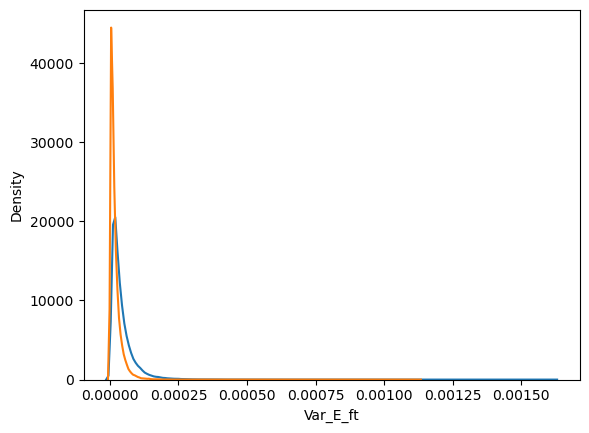

In [23]:
sns.kdeplot(result['Var_E_ft'])
sns.kdeplot(result['Var_I_ft'])

<Axes: xlabel='Var_E_sb', ylabel='Density'>

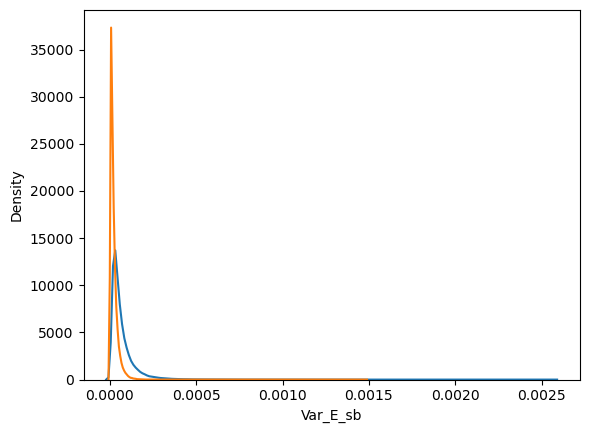

In [24]:
sns.kdeplot(result['Var_E_sb'])
sns.kdeplot(result['Var_I_sb'])

## **Get CI for each word, compute share of words, where true E and I are within 95% CI**


In [32]:
# get CI for each wird
records = {}

for word, sims in word_sim_dict.items():
    metrics = {}
    for model_key, model_label in [("ft", "ft"), ("sb", "sb")]:
        for sim_type in ["e", "i"]:
            key_prefix = f"{sim_type}_{model_key}"  # e_ft, i_ft, etc.
            scores = sims[f"{sim_type}_sim_{model_key}"]
            metrics[f"{key_prefix}_mean"] = np.mean(scores)
            metrics[f"{key_prefix}_std"] = np.std(scores)
            metrics[f"{key_prefix}_ci_lower"] = np.percentile(scores, 2.5)
            metrics[f"{key_prefix}_ci_upper"] = np.percentile(scores, 97.5)
    records[word] = metrics

# Convert to DataFrame
summary_df = pd.DataFrame.from_dict(records, orient='index').reset_index()
summary_df = summary_df.rename(columns={"index": "word"})
summary_df

,word,e_ft_mean,e_ft_std,e_ft_ci_lower,e_ft_ci_upper,i_ft_mean,i_ft_std,i_ft_ci_lower,i_ft_ci_upper,e_sb_mean,e_sb_std,e_sb_ci_lower,e_sb_ci_upper,i_sb_mean,i_sb_std,i_sb_ci_lower,i_sb_ci_upper
0,trump,0.255440,0.012793,0.237234,0.279031,0.385222,0.009674,0.375319,0.398585,-0.064813,0.011672,-0.084600,-0.049964,0.017054,0.002392,0.013891,0.019604
1,people,0.221802,0.009088,0.205854,0.238748,0.341627,0.007279,0.333604,0.351670,-0.084434,0.010654,-0.103852,-0.069450,0.042458,0.003757,0.036136,0.046504
2,would,0.264832,0.010873,0.251016,0.287186,0.219535,0.008040,0.209941,0.230174,-0.011766,0.004555,-0.022100,-0.003746,-0.094193,0.002536,-0.097277,-0.090248
3,like,0.164693,0.008156,0.146802,0.176599,0.269128,0.004295,0.261756,0.272677,-0.080568,0.007233,-0.089528,-0.069774,0.054991,0.008217,0.044149,0.069422
4,think,0.394063,0.010163,0.377984,0.417044,0.551530,0.004900,0.545627,0.558268,0.037867,0.004797,0.028104,0.045750,0.274381,0.003185,0.270785,0.279149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70443,lofgrens,0.030453,0.002875,0.024367,0.035019,-0.066352,0.002781,-0.070247,-0.061975,0.076537,0.013405,0.058294,0.097641,-0.032091,0.002487,-0.035376,-0.027947
70444,whirring,-0.100626,0.005647,-0.108249,-0.086908,-0.019124,0.002150,-0.022259,-0.015821,-0.009657,0.009828,-0.025543,0.004663,0.049906,0.005450,0.040306,0.056420
70445,classicals,0.049449,0.005360,0.040507,0.056337,0.081976,0.000856,0.081086,0.083311,0.075857,0.013550,0.057018,0.101260,0.076550,0.003180,0.072044,0.081301
70446,reoccuring,-0.020292,0.003034,-0.027840,-0.016204,0.021812,0.002623,0.019380,0.026770,-0.001414,0.007110,-0.012512,0.011800,0.053575,0.006626,0.046816,0.066124


In [37]:
summary_df = summary_df.merge(word_freq_df[["word", "finetuned_word_I", "finetuned_word_E", "self_word_I", "self_word_E"]])

In [42]:

def check_within_ci(row, og_val_col, ci_low_col, ci_up_col):
    og_val = row[og_val_col]
    return row[ci_low_col] <= og_val <= row[ci_up_col]

# Add boolean flags for each model-concept
summary_df["in_ci_i_ft"] = summary_df.apply(lambda row: check_within_ci(row, "finetuned_word_I", "i_ft_ci_lower", "i_ft_ci_upper"), axis=1)
summary_df["in_ci_e_ft"] = summary_df.apply(lambda row: check_within_ci(row, "finetuned_word_E", "e_ft_ci_lower", "e_ft_ci_upper"), axis=1)
summary_df["in_ci_i_sb"] = summary_df.apply(lambda row: check_within_ci(row, "self_word_I", "i_sb_ci_lower", "i_sb_ci_upper"), axis=1)
summary_df["in_ci_e_sb"] = summary_df.apply(lambda row: check_within_ci(row, "self_word_E", "e_sb_ci_lower", "e_sb_ci_upper"), axis=1)

In [41]:
summary_df.to_csv("output_bootstrapping/word_in_CI.csv", index = False)

In [2]:
summary_df = pd.read_csv("output_bootstrapping/word_in_CI.csv")

In [4]:
# Calculate shares
ci_results = {
    "ft_E": summary_df["in_ci_e_ft"].mean(),
    "ft_I": summary_df["in_ci_i_ft"].mean(),
    "sb_E": summary_df["in_ci_e_sb"].mean(),
    "sb_I": summary_df["in_ci_i_sb"].mean()
}

ci_results_df = pd.DataFrame.from_dict(ci_results, orient='index', columns=["share_in_CI"]).reset_index()
ci_results_df.rename(columns={"index": "model_concept"}, inplace=True)
ci_results_df

,model_concept,share_in_CI
0,ft_E,0.818601
1,ft_I,0.626585
2,sb_E,0.861570
3,sb_I,0.546056


In [5]:

ci_results_df[["model", "concept"]] = ci_results_df["model_concept"].str.split("_", expand=True)
ci_results_df

,model_concept,share_in_CI,model,concept
0,ft_E,0.818601,ft,E
1,ft_I,0.626585,ft,I
2,sb_E,0.861570,sb,E
3,sb_I,0.546056,sb,I


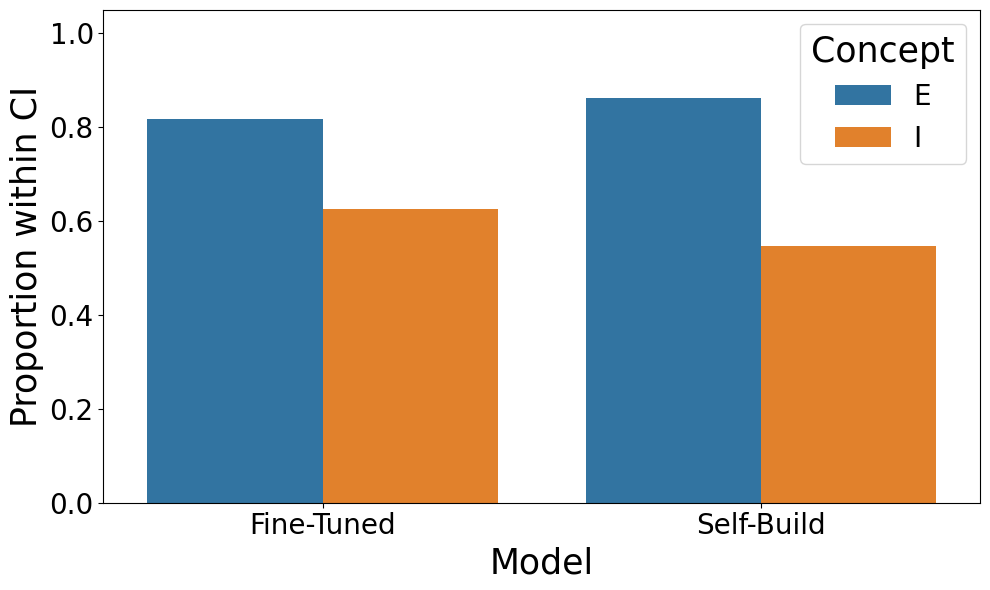

In [7]:
custom_palette = {
    "E": "#1F77B4",   # blue
    "I": "#FF7F0E"   # orange
}

label_map = {
    "ft": "Fine-Tuned",
    "sb": "Self-Build"
}


# Font settings
label_fontsize = 25
tick_fontsize = 20
title_fontsize = 12

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=ci_results_df,
    x="model",
    y="share_in_CI",
    hue="concept",
    palette=custom_palette
)

# Set custom x-tick labels
xticks = ax.get_xticks()
xticklabels = ax.get_xticklabels()
new_labels = [label_map.get(label.get_text(), label.get_text()) for label in xticklabels]
ax.set_xticks(xticks)
ax.set_xticklabels(new_labels, fontsize=tick_fontsize)

# Axis and plot styling
ax.set_ylim(0, 1.05)
#ax.axhline(0.95, color="gray", linestyle="--", linewidth=1, label="95% Reference")
ax.set_ylabel("Proportion within CI", fontsize=label_fontsize)
ax.set_xlabel("Model", fontsize=label_fontsize)
#ax.set_title("Share of True Similarity Scores within Bootstrapped 95% CI", fontsize=title_fontsize)

# Ticks
ax.tick_params(axis='y', labelsize=tick_fontsize)

# Legend
legend = ax.legend(title="Concept", fontsize=tick_fontsize, title_fontsize=label_fontsize)
#legend.get_frame().set_linewidth(0.5) 

plt.tight_layout()

plt.savefig("output_bootstrapping/word_shares_plot.pdf")
plt.show()


# **Plot Influential Words**

In [10]:
top_10_E_ft = result[result['Mean_E_ft'].isin(result['Mean_E_ft'].sort_values(ascending = False).head(10))]
top_10_I_ft = result[result['Mean_I_ft'].isin(result['Mean_I_ft'].sort_values(ascending = False).head(10))]

top_10_E_sb = result[result['Mean_E_sb'].isin(result['Mean_E_sb'].sort_values(ascending = False).head(10))]
top_10_I_sb = result[result['Mean_I_sb'].isin(result['Mean_I_sb'].sort_values(ascending = False).head(10))]


In [26]:
def plot_influential_words(influential_words, model, concept,
                           label_fontsize=16, tick_fontsize=14):
   
    n_words = len(influential_words)
    n_cols = 5
    n_rows = math.ceil(n_words / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows), sharex=True)
    axs = axs.flatten()

    for i, word in enumerate(influential_words):
        ax = axs[i]
        sims = word_sim_dict[word]
        original_row = word_freq_df[word_freq_df["word"] == word]

        if model == "ft":
            data = [sims['e_sim_ft'], sims['i_sim_ft']]
            labels = ['E_sim_ft', 'I_sim_ft']
            orig_e = original_row["finetuned_word_E"].values[0]
            orig_i = original_row["finetuned_word_I"].values[0]
        else:
            data = [sims['e_sim_sb'], sims['i_sim_sb']]
            labels = ['E_sim_sb', 'I_sim_sb']
            orig_e = original_row["self_word_E"].values[0]
            orig_i = original_row["self_word_I"].values[0]

        ax.boxplot(data, labels=labels, patch_artist=True)
        ax.axhline(orig_e, color="#1F77B4", linestyle="--", label="Original E-sim")
        ax.axhline(orig_i, color="#FF7F0E", linestyle="--", label="Original I-sim")

        ax.set_title(f"Word: {word}", fontsize=label_fontsize)

        # Show y-axis label only for first column
        if i % n_cols == 0:
            ax.set_ylabel("Cosine Similarity", fontsize=label_fontsize)
        else:
            ax.set_yticklabels([])

        # Show x-axis ticks only for last row
        if i // n_cols == n_rows - 1:
            ax.tick_params(axis='x', labelsize=tick_fontsize)
        else:
            ax.set_xticklabels([])
            ax.tick_params(axis='x', bottom=False)

        # Y-ticks
        ax.tick_params(axis='y', labelsize=tick_fontsize)
        ax.grid(True, linestyle="--", alpha=0.5)

    # Hide unused subplots
    for j in range(i + 1, len(axs)):
        axs[j].axis("off")

    # Shared legend
    model_names = {"ft": "fine-tuned", "sb": "self build"}
    model_name = model_names[model]

    # Place legend outside plot
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=label_fontsize)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    plot_path = f"output_bootstrapping/Top_{concept}_{model}.pdf"
    plt.savefig(plot_path)
    plt.show()


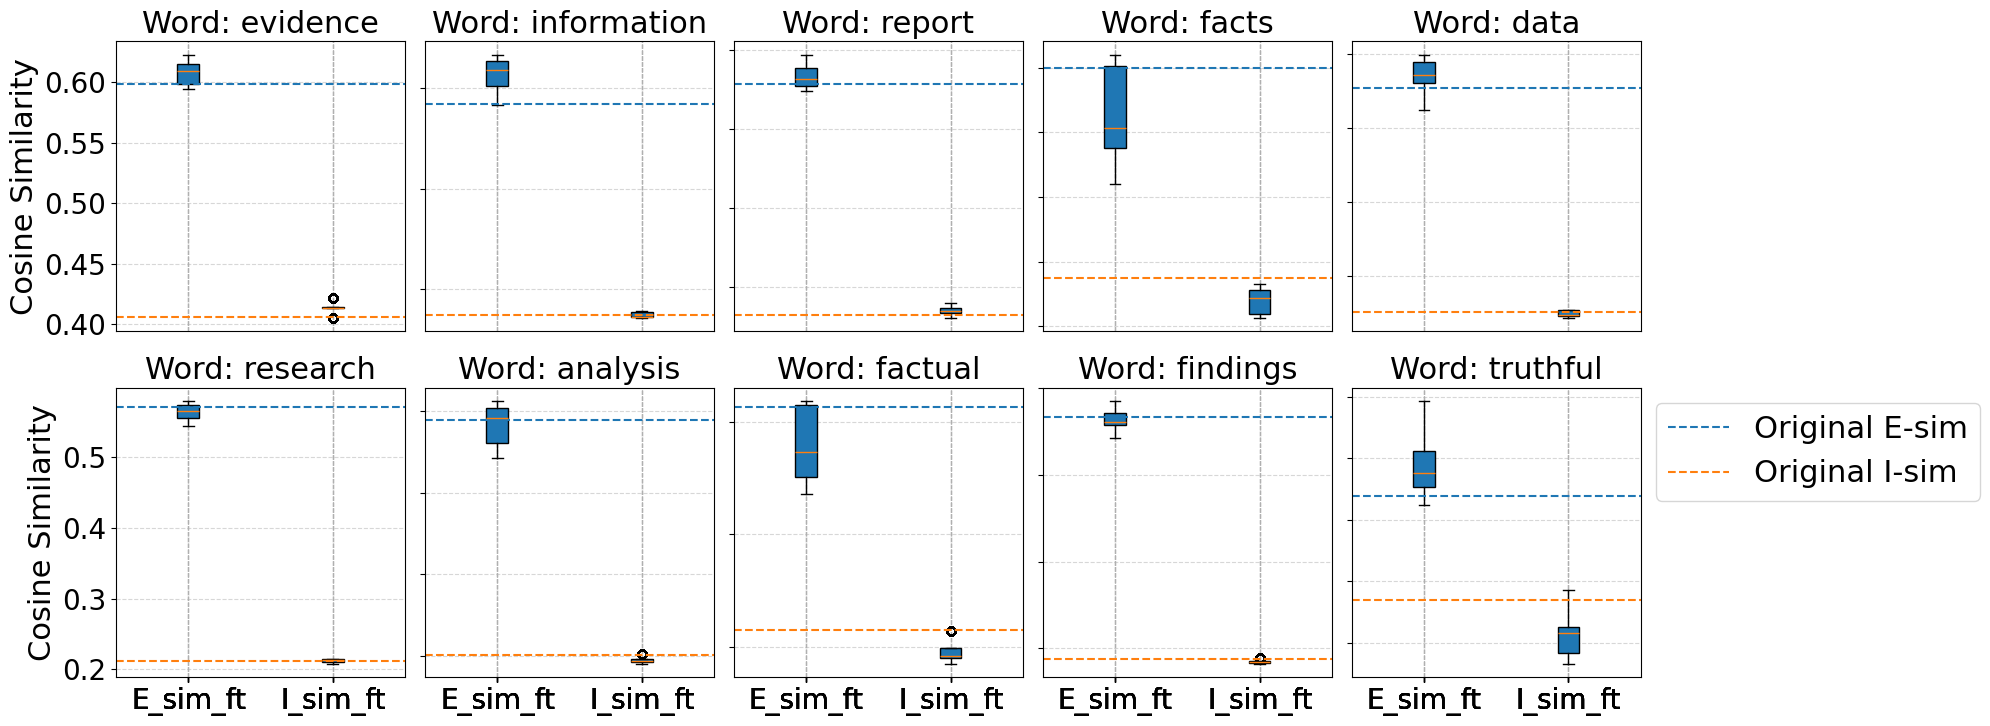

In [28]:
plot_influential_words(top_10_E_ft["words"], model="ft", concept="Evidence",
                       label_fontsize=22, tick_fontsize=20)

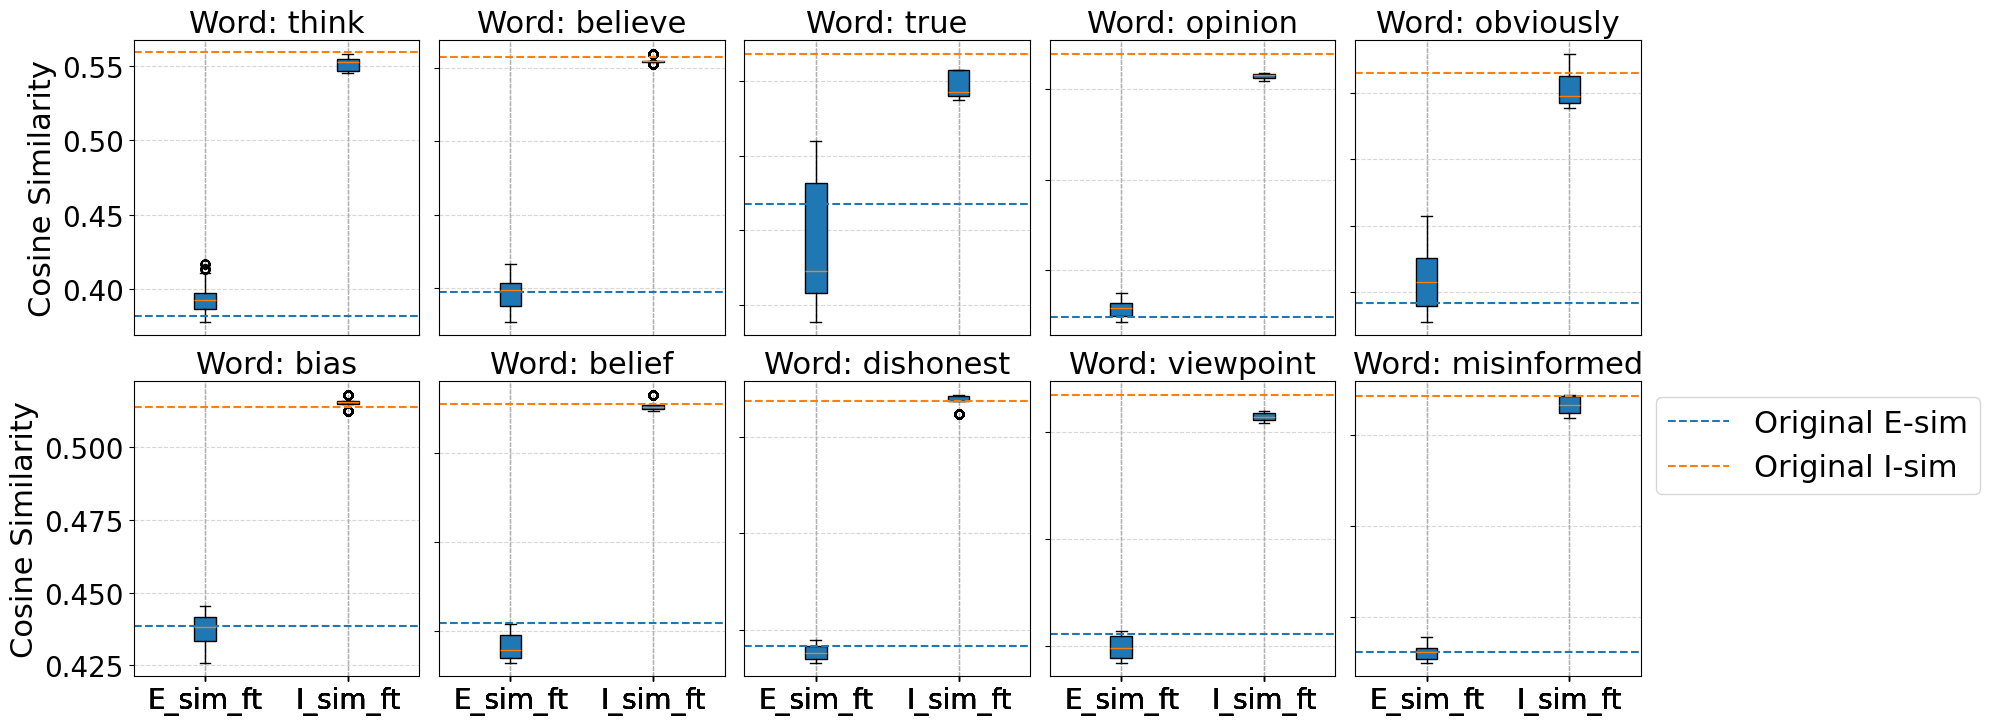

In [29]:
plot_influential_words(top_10_I_ft["words"], 'ft', "Intuition",
                       label_fontsize=22, tick_fontsize=20)

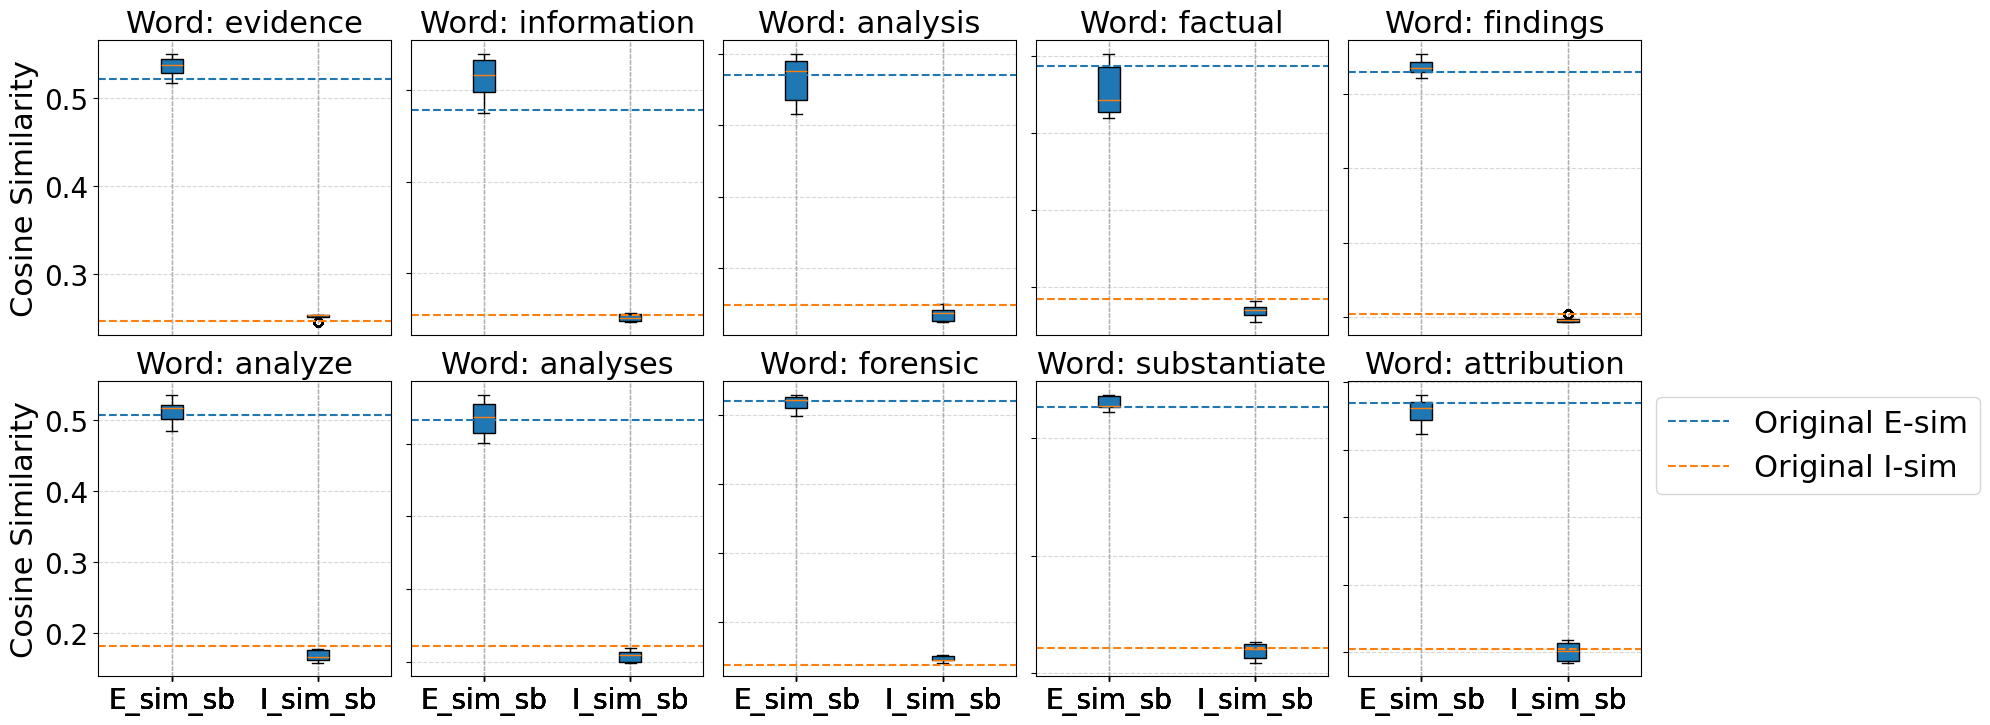

In [30]:
plot_influential_words(top_10_E_sb["words"], 'sb', "Evidence",
                       label_fontsize=22, tick_fontsize=20)

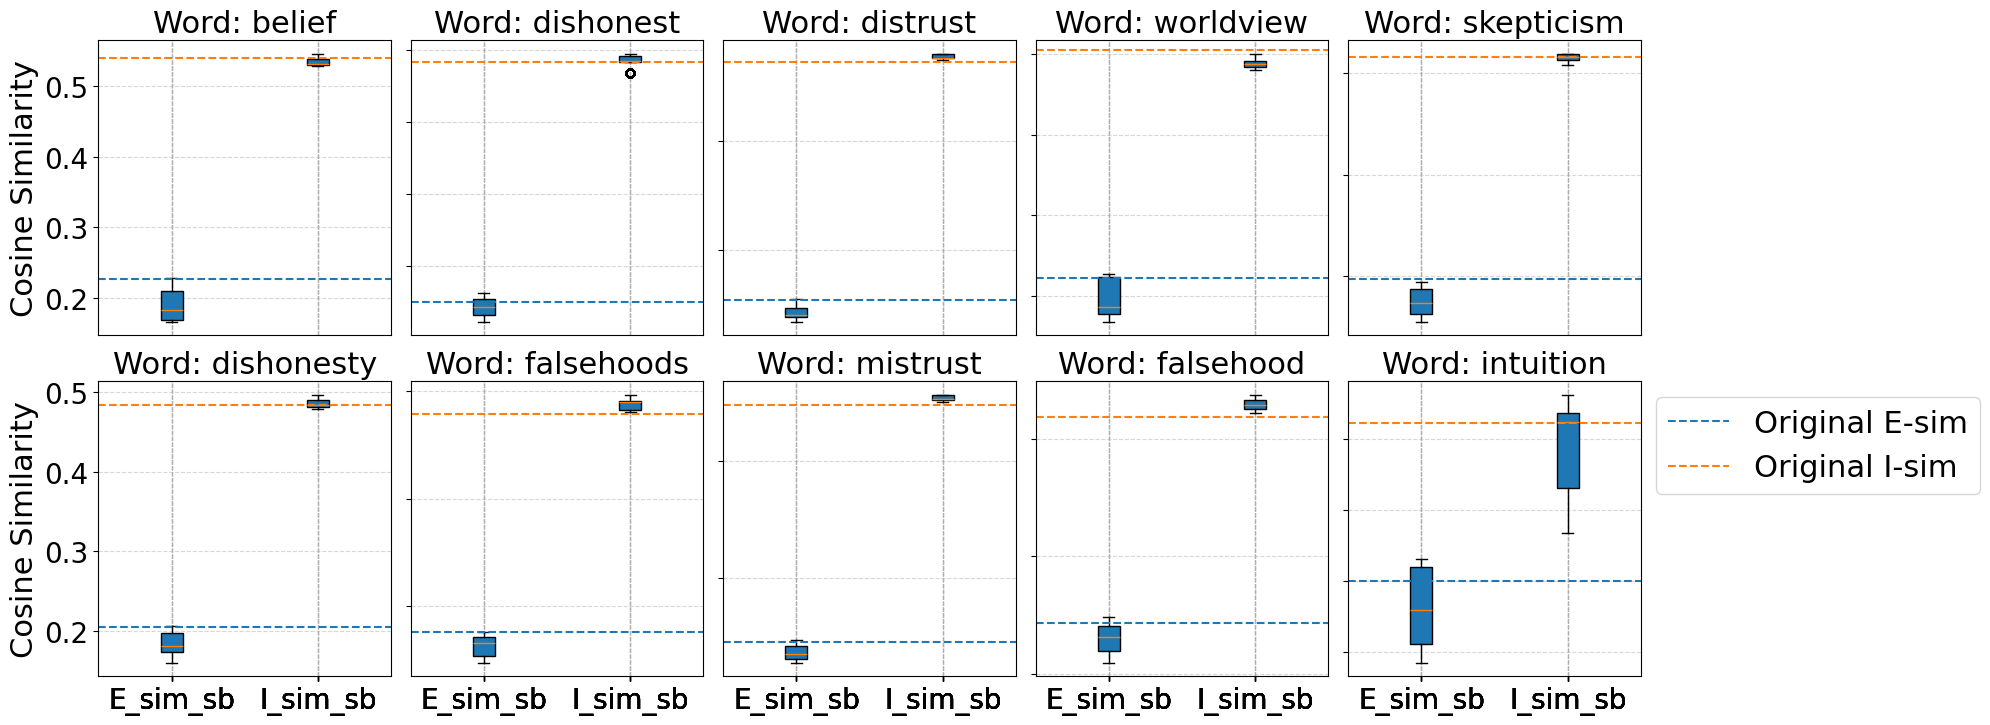

In [31]:
plot_influential_words(top_10_I_sb["words"], 'sb', "Intuition",
                       label_fontsize=22, tick_fontsize=20)

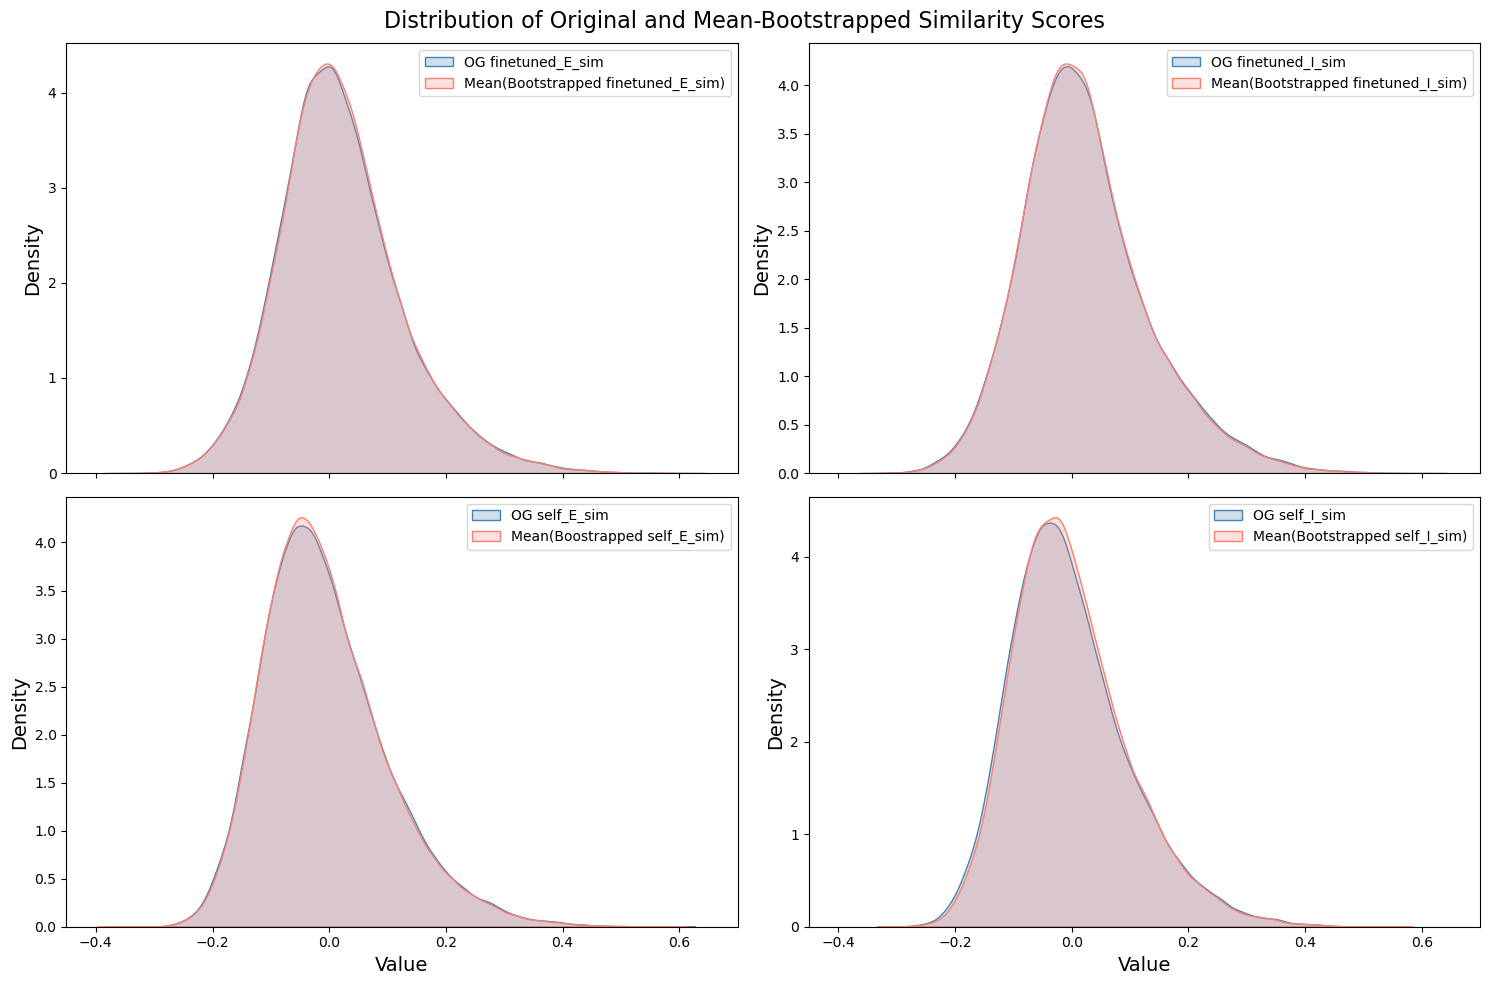

In [195]:

fig, axs = plt.subplots(2, 2, figsize=(15,10), sharex=True)

# Plot on the first subplot (0, 0)
sns.kdeplot(word_freq_df['finetuned_word_E'], label='OG finetuned_E_sim', color="steelblue", fill=True, ax=axs[0, 0])
sns.kdeplot(result['Mean_E_ft'], label='Mean(Bootstrapped finetuned_E_sim)', color="salmon", fill=True, ax=axs[0, 0])

# Plot on the second subplot (0, 1)
sns.kdeplot(word_freq_df['finetuned_word_I'], label='OG finetuned_I_sim', color="steelblue", fill=True, ax=axs[0, 1])
sns.kdeplot(result['Mean_I_ft'], label='Mean(Bootstrapped finetuned_I_sim)', color="salmon", fill=True, ax=axs[0, 1])

# Plot on the third subplot (1, 0)
sns.kdeplot(word_freq_df['self_word_E'], label='OG self_E_sim', color="steelblue", fill=True, ax=axs[1, 0])
sns.kdeplot(result['Mean_E_sb'], label='Mean(Boostrapped self_E_sim)', color="salmon", fill=True, ax=axs[1, 0])

# Plot on the fourth subplot (1, 1)
sns.kdeplot(word_freq_df['self_word_I'], label='OG self_I_sim', color="steelblue", fill=True, ax=axs[1, 1])
sns.kdeplot(result['Mean_I_sb'], label='Mean(Bootstrapped self_I_sim)', color="salmon", fill=True, ax=axs[1, 1])

# Add titles and labels
#axs[0, 0].set_title('Distribution of Original Fine-Tuned Evidence Similarity and Mean of Bootstrapped Similarity (E)', fontsize=14)
#axs[0, 1].set_title('Distribution of Original Fine-Tuned Evidence Similarity and Mean of Bootstrapped Similarity (I)', fontsize=14)
#axs[1, 0].set_title('Distribution of Original Self-Built Evidence Similarity and Mean of Bootstrapped Similarity (E)', fontsize=14)
#axs[1, 1].set_title('Distribution of Original Self-Built Evidence Similarity and Mean of Bootstrapped Similarity (I)', fontsize=14)

plt.suptitle('Distribution of Original and Mean-Bootstrapped Similarity Scores', fontsize=16)
for ax in axs.flat:
    ax.set_xlabel('Value', fontsize = 14)
    ax.set_ylabel('Density', fontsize = 14)
    ax.legend()

# Automatically adjust layout to fit the titles and labels
plt.tight_layout()

plt.savefig("output_bootstrapping/KDE_OG_vs_BootstrappMeans.png")
# Show the plot
plt.show()

In [109]:
e_ft_var_boots = []
i_ft_var_boots = []

e_sb_var_boots = []
i_sb_var_boots = []

for b in range(1000):
    e_ft_vals = [word_sim_dict[word]['e_sim_ft'][b] for word in word_sim_dict]
    i_ft_vals = [word_sim_dict[word]['i_sim_ft'][b] for word in word_sim_dict]
    
    e_sb_vals = [word_sim_dict[word]['e_sim_sb'][b] for word in word_sim_dict]
    i_sb_vals = [word_sim_dict[word]['i_sim_sb'][b] for word in word_sim_dict]
    
    e_ft_var_boots.append(np.var(e_ft_vals, ddof=1))
    i_ft_var_boots.append(np.var(i_ft_vals, ddof=1))

    e_sb_var_boots.append(np.var(e_sb_vals, ddof=1))
    i_sb_var_boots.append(np.var(i_sb_vals, ddof=1))



In [129]:
# Original variances (not bootstrapped)
e_ft_orig = word_freq_df['finetuned_word_E']
i_ft_orig = word_freq_df['finetuned_word_I']

e_sb_orig = word_freq_df['self_word_E']
i_sb_orig = word_freq_df['self_word_I']


e_ft_orig_var = np.var(e_ft_orig)
i_ft_orig_var = np.var(i_ft_orig)

e_sb_orig_var = np.var(e_sb_orig)
i_sb_orig_var = np.var(i_sb_orig)

In [130]:
print(e_ft_orig_var)
print(i_ft_orig_var)

print(e_sb_orig_var)
print(i_sb_orig_var)

0.011458472348749638
0.012101078405976295
0.011448903940618038
0.010493267327547073


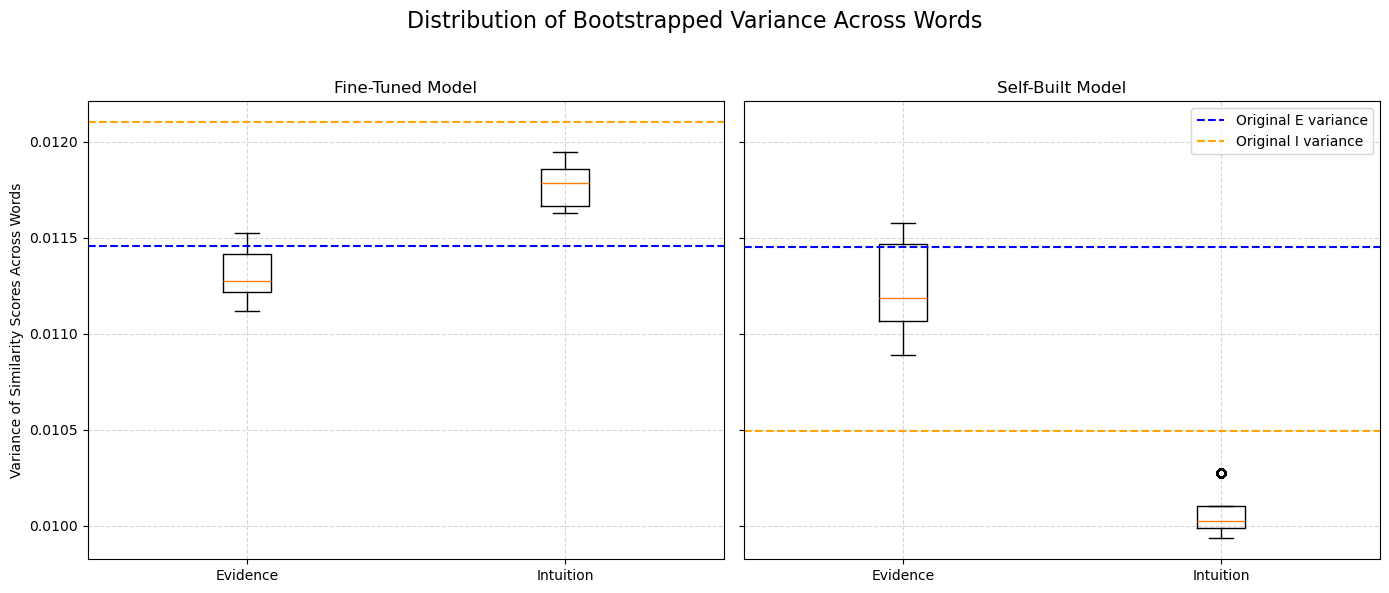

In [134]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# --- Plot 1: Fine-Tuned Model ---
axs[0].boxplot([e_ft_var_boots, i_ft_var_boots], labels=["Evidence", "Intuition"])
axs[0].axhline(e_ft_orig_var, color='blue', linestyle='--', label='Original E variance')
axs[0].axhline(i_ft_orig_var, color='orange', linestyle='--', label='Original I variance')
axs[0].set_title("Fine-Tuned Model")
axs[0].set_ylabel("Variance of Similarity Scores Across Words")
axs[0].grid(True, linestyle="--", alpha=0.5)
#axs[0].legend()

# --- Plot 2: Self-Built Model ---
axs[1].boxplot([e_sb_var_boots, i_sb_var_boots], labels=["Evidence", "Intuition"])
axs[1].axhline(e_sb_orig_var, color='blue', linestyle='--', label='Original E variance')
axs[1].axhline(i_sb_orig_var, color='orange', linestyle='--', label='Original I variance')
axs[1].set_title("Self-Built Model")
axs[1].grid(True, linestyle="--", alpha=0.5)
#axs[1].legend()

# --- Finishing Touches ---
fig.suptitle("Distribution of Bootstrapped Variance Across Words", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.legend()
plt.show()

**Interpretation**

* For Intuition based language, the variance in scores across all words is higher using the full dictionary, compared to the bootstrap samples
* More words add more variation in scores

In [45]:

# Example: ft model
dict_words = df_intuition["word"].values  # or df_evidence
embeddings = np.vstack(df_intuition["embedding_ft"].values)

#ref_vector = np.mean(embeddings, axis=0)
OG_intuition_dim_ft

similarities = cosine_similarity(embeddings, OG_intuition_dim_ft.reshape(1, -1)).flatten()

df_sim = pd.DataFrame({
    "word": dict_words,
    "similarity_to_mean": similarities
}).sort_values(by="similarity_to_mean", ascending=False)

# Top and bottom contributors
print("Top influencers:")
print(df_sim.head(10))

print("\nBottom influencers:")
print(df_sim.tail(10))


NameError: name 'df_intuition' is not defined

## **Outliars in terms of high or low I score**

In [142]:
word_freq_df['finetuned_word_I'].sort_values()

def detect_outliers(data, col, label):
    q1 = np.percentile(data[col], 25)
    q3 = np.percentile(data[col], 75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    print(f"{label} Outliers: {outliers}")
    return outliers

outliers_ft = detect_outliers(word_freq_df, 'finetuned_word_I', "Intuition")
outliers_sb = detect_outliers(word_freq_df, 'self_word_I', "Intuition")

Intuition Outliers:                word  frequency  len  \
0             trump    1220659    5   
1            people    1028121    6   
4             think     697822    5   
6               one     621558    3   
8              even     475388    4   
...             ...        ...  ...   
66713  teleological         11   12   
66831     falseness         11    9   
67480    positivist         11   10   
67999     flippancy         10    9   
68837       fatuous         10    7   

                               finetuned_word_embeddings  \
0      [-0.03138235, -0.0026199205, 0.016560156, -0.0...   
1      [-0.14400238, -0.017160604, -0.009866504, -0.0...   
4      [-0.13961822, -0.14024219, -0.032561995, -0.05...   
6      [0.023817789, -0.015066824, -0.08053551, -0.00...   
8      [-0.13206743, -0.06931283, 0.021461809, -0.044...   
...                                                  ...   
66713  [0.054038774, 0.03972015, 0.04461448, -0.03997...   
66831  [-0.04304775, 0.01757718

In [143]:
outliers_ft

,word,frequency,len,finetuned_word_embeddings,self_word_embeddings,finetuned_word_I,finetuned_word_E,self_word_I,self_word_E
0,trump,1220659,5,"[-0.03138235, -0.0026199205, 0.016560156, -0.0...","[0.06490105, -0.030755918, 0.07042432, 0.04734...",0.383221,0.248026,0.011930,-0.075950
1,people,1028121,6,"[-0.14400238, -0.017160604, -0.009866504, -0.0...","[-0.054518852, -0.008642221, -0.00013800293, -...",0.340338,0.217950,0.032023,-0.075853
4,think,697822,5,"[-0.13961822, -0.14024219, -0.032561995, -0.05...","[0.0047624307, -0.04358237, -0.06306772, 0.047...",0.559520,0.381980,0.282668,0.035809
6,one,621558,3,"[0.023817789, -0.015066824, -0.08053551, -0.00...","[0.05568091, -0.10245892, -0.0228534, 0.100319...",0.286304,0.310731,-0.066257,0.001129
8,even,475388,4,"[-0.13206743, -0.06931283, 0.021461809, -0.044...","[0.026709959, -0.05590899, 0.04174119, -0.0199...",0.356515,0.336880,0.025325,0.029430
...,...,...,...,...,...,...,...,...,...
66713,teleological,11,12,"[0.054038774, 0.03972015, 0.04461448, -0.03997...","[0.007704811, -0.04115064, -0.10367049, 0.0646...",0.284289,0.235692,0.214463,0.218492
66831,falseness,11,9,"[-0.04304775, 0.017577186, -0.020761888, 0.001...","[-0.0024033273, 0.13484932, -0.0111409705, -0....",0.323357,0.161072,0.320444,0.210680
67480,positivist,11,10,"[-0.04280739, -0.025618559, 0.05627342, -0.003...","[0.02850543, -0.044479735, -0.01657213, 0.0107...",0.318185,0.303878,0.113066,0.237510
67999,flippancy,10,9,"[-0.05203348, -0.056158934, -0.0042137117, 0.0...","[0.020247862, 0.0141816875, -0.0030062776, -0....",0.285908,0.056466,0.061041,-0.057311


In [145]:
outliers_sb

,word,frequency,len,finetuned_word_embeddings,self_word_embeddings,finetuned_word_I,finetuned_word_E,self_word_I,self_word_E
4,think,697822,5,"[-0.13961822, -0.14024219, -0.032561995, -0.05...","[0.0047624307, -0.04358237, -0.06306772, 0.047...",0.559520,0.381980,0.282668,0.035809
73,believe,173118,7,"[-0.14456914, -0.12517047, 0.0073199975, -0.04...","[0.0031847502, 0.034254186, -0.031160157, -0.0...",0.607782,0.446920,0.394999,0.186106
175,wrong,108971,5,"[-0.1514677, -0.083890244, -0.058557022, 0.031...","[0.027608244, 0.019978754, -0.052954715, -0.01...",0.508084,0.420311,0.293948,0.132278
180,agree,106253,5,"[-0.08983256, -0.09929409, 0.028658023, 0.0037...","[0.0249551, 0.025384987, -0.08402064, 0.057363...",0.462642,0.362685,0.282387,0.167159
190,media,101641,5,"[-0.091173954, 0.08759383, -0.017911308, -0.12...","[0.036505435, 0.011972777, -0.07191998, -0.081...",0.352521,0.209874,0.254925,0.074172
...,...,...,...,...,...,...,...,...,...
67948,lyotard,10,7,"[-0.031521693, -0.026863819, 0.09034145, -0.02...","[-0.046139106, 0.00479816, -0.046911944, -0.07...",0.090790,0.114713,0.268725,0.206309
68637,obscurantism,10,12,"[-0.039267004, -0.062808305, -0.0018619727, -0...","[-0.05169848, 0.053434677, 0.07053062, -0.0606...",0.275143,0.157057,0.327168,0.047043
68911,egocentrism,10,11,"[0.047180526, -0.03028758, 0.023773994, -0.064...","[-0.12760162, 0.009967628, 0.038658697, -0.091...",0.199718,0.041546,0.296872,-0.003936
69237,deceitfulness,10,13,"[0.014549581, -0.027560635, -0.05968367, 0.017...","[0.045838024, 0.05716607, 0.061362837, 0.00273...",0.143605,0.042728,0.276835,0.127162
